In [70]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
from config import weather_api_key
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

In [71]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [72]:
coordinates = list(lats_lngs)
coordinates

[(-31.880782529600395, 22.346786705514177),
 (85.76099918938215, 11.062304677798352),
 (29.37918891549009, 124.38911095419223),
 (6.354020507724982, 40.69162029592212),
 (-62.42383854269927, 61.77494804259999),
 (-17.254561008098946, 16.339088388046235),
 (-4.3461565856777185, 34.253463167902396),
 (-65.81545292544436, 22.924891153444094),
 (-55.04341149406089, -137.95592603309711),
 (40.39266766526907, 87.92572325781566),
 (-37.372187135345165, -161.45313950666073),
 (32.62000982094716, -115.74353219802634),
 (-74.08321098062102, -37.39742374261806),
 (-1.3332281271162003, -138.09077843936515),
 (-30.621997661731392, 109.58213575973059),
 (-28.334914458062322, -71.12470226043668),
 (-30.924211581100835, -178.55973041496287),
 (35.3408170102781, -129.54981116954974),
 (-69.20546254404742, -36.69006000788275),
 (-67.58926299056787, -54.46065321492614),
 (-2.1546772795148, 3.7874505565495724),
 (17.79624344652693, 7.181874548349185),
 (-23.85640915509643, -51.44019237930755),
 (28.011966

In [73]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = (citipy.nearest_city(coordinate[0], coordinate[1]).city_name)
# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print((cities))

['carnarvon', 'barentsburg', 'shenjiamen', 'ginir', 'taolanaro', 'eenhana', 'shelui', 'bredasdorp', 'rikitea', 'korla', 'avarua', 'progreso', 'ushuaia', 'atuona', 'geraldton', 'vallenar', 'vaini', 'ukiah', 'port-gentil', 'arlit', 'faxinal', 'los llanos de aridane', 'busselton', 'khatanga', 'port lincoln', 'thompson', 'mundra', 'tiksi', 'narsaq', 'chapais', 'kaitangata', 'yellowknife', 'jiangyou', 'provideniya', 'lodeynoye pole', 'kodiak', 'santa catalina', 'shelburne', 'attawapiskat', 'kandrian', 'hermanus', 'cidreira', 'hasaki', 'kibara', 'vardo', 'olafsvik', 'arraial do cabo', 'ahipara', 'merrill', 'mehamn', 'hobart', 'marinette', 'antofagasta', 'haradok', 'east london', 'nizhneyansk', 'severo-kurilsk', 'albany', 'belushya guba', 'khotyn', 'bonthe', 'khatima', 'norman wells', 'mataura', 'dongsheng', 'bambous virieux', 'lagos', 'upernavik', 'amderma', 'pingliang', 'tsiroanomandidy', 'timmins', 'dire dawa', 'dikson', 'bluff', 'bathsheba', 'new norfolk', 'soloneshnoye', 'baruun-urt', 'p

In [74]:
# create an empty list for weather data
city_data =[]
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    print(i)
    if (i % 50==0 and i >= 50):
        set_count += 1
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
     # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        city_weather = requests.get(city_url).json()
        # Parse the JSON and retrieve data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({"City": city.title(),
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})
    
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



    

Beginning Data Retrieval     
-----------------------------
0
Processing Record 1 of Set 1 | carnarvon
1
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
2
Processing Record 3 of Set 1 | shenjiamen
3
Processing Record 4 of Set 1 | ginir
4
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
5
Processing Record 6 of Set 1 | eenhana
6
Processing Record 7 of Set 1 | shelui
7
Processing Record 8 of Set 1 | bredasdorp
8
Processing Record 9 of Set 1 | rikitea
9
Processing Record 10 of Set 1 | korla
10
Processing Record 11 of Set 1 | avarua
11
Processing Record 12 of Set 1 | progreso
12
Processing Record 13 of Set 1 | ushuaia
13
Processing Record 14 of Set 1 | atuona
14
Processing Record 15 of Set 1 | geraldton
15
Processing Record 16 of Set 1 | vallenar
16
Processing Record 17 of Set 1 | vaini
17
Processing Record 18 of Set 1 | ukiah
18
Processing Record 19 of Set 1 | port-gentil
19
Processing Record 20 of Set 1 | arlit
20
Processing Record 21 of Set 1 |

174
Processing Record 175 of Set 4 | cardenas
175
Processing Record 176 of Set 4 | socorro
176
Processing Record 177 of Set 4 | bam
177
Processing Record 178 of Set 4 | atyashevo
178
Processing Record 179 of Set 4 | rio gallegos
179
Processing Record 180 of Set 4 | chuy
180
Processing Record 181 of Set 4 | port stanley
181
Processing Record 182 of Set 4 | champerico
182
Processing Record 183 of Set 4 | ozernovskiy
183
Processing Record 184 of Set 4 | longyearbyen
184
Processing Record 185 of Set 4 | charleston
185
Processing Record 186 of Set 4 | cherskiy
186
Processing Record 187 of Set 4 | hithadhoo
187
Processing Record 188 of Set 4 | mar del plata
188
Processing Record 189 of Set 4 | sioux falls
189
Processing Record 190 of Set 4 | itarema
190
Processing Record 191 of Set 4 | sentyabrskiy
City not found. Skipping...
191
Processing Record 192 of Set 4 | srednekolymsk
192
Processing Record 193 of Set 4 | sisimiut
193
Processing Record 194 of Set 4 | talaya
194
Processing Record 195 o

348
Processing Record 349 of Set 7 | lamar
349
Processing Record 350 of Set 7 | chokurdakh
350
Processing Record 351 of Set 8 | taunggyi
351
Processing Record 352 of Set 8 | luderitz
352
Processing Record 353 of Set 8 | baft
353
Processing Record 354 of Set 8 | nemours
354
Processing Record 355 of Set 8 | mahebourg
355
Processing Record 356 of Set 8 | whitehorse
356
Processing Record 357 of Set 8 | kerki
City not found. Skipping...
357
Processing Record 358 of Set 8 | nemuro
358
Processing Record 359 of Set 8 | warqla
City not found. Skipping...
359
Processing Record 360 of Set 8 | namibe
360
Processing Record 361 of Set 8 | tocopilla
361
Processing Record 362 of Set 8 | wuwei
362
Processing Record 363 of Set 8 | urdoma
363
Processing Record 364 of Set 8 | coihaique
364
Processing Record 365 of Set 8 | anloga
365
Processing Record 366 of Set 8 | uray
366
Processing Record 367 of Set 8 | nikolskoye
367
Processing Record 368 of Set 8 | kulhudhuffushi
368
Processing Record 369 of Set 8 | 

City not found. Skipping...
518
Processing Record 519 of Set 11 | karoi
519
Processing Record 520 of Set 11 | tombouctou
520
Processing Record 521 of Set 11 | sao joao da barra
521
Processing Record 522 of Set 11 | pipri
522
Processing Record 523 of Set 11 | nampula
523
Processing Record 524 of Set 11 | takoradi
524
Processing Record 525 of Set 11 | chara
525
Processing Record 526 of Set 11 | ossora
526
Processing Record 527 of Set 11 | ambon
527
Processing Record 528 of Set 11 | maniitsoq
528
Processing Record 529 of Set 11 | satana
529
Processing Record 530 of Set 11 | hovd
530
Processing Record 531 of Set 11 | sabang
531
Processing Record 532 of Set 11 | bayangol
532
Processing Record 533 of Set 11 | canton
533
Processing Record 534 of Set 11 | cap malheureux
534
Processing Record 535 of Set 11 | tongzi
535
Processing Record 536 of Set 11 | naenwa
City not found. Skipping...
536
Processing Record 537 of Set 11 | pontes e lacerda
537
Processing Record 538 of Set 11 | aksarka
538
Proc

In [75]:
print(len(city_data))

565


In [76]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.87,113.63,66.20,88,0,12.75,AU,2020-10-22 22:55:00
1,Shenjiamen,29.96,122.30,61.77,65,22,19.75,CN,2020-10-22 22:55:01
2,Ginir,7.13,40.70,56.98,79,79,5.59,ET,2020-10-22 22:55:01
3,Eenhana,-17.47,16.33,84.20,18,66,6.93,NA,2020-10-22 22:55:01
4,Shelui,-4.37,34.20,72.28,42,36,14.72,TZ,2020-10-22 22:55:02
5,Bredasdorp,-34.53,20.04,64.40,93,78,5.82,ZA,2020-10-22 22:55:02
6,Rikitea,-23.12,-134.97,74.61,80,92,15.39,PF,2020-10-22 22:55:02
7,Korla,41.76,86.15,46.51,47,0,4.92,CN,2020-10-22 22:55:03
8,Avarua,-21.21,-159.78,78.80,83,99,13.87,CK,2020-10-22 22:55:03
9,Progreso,21.28,-89.67,84.20,79,75,6.93,MX,2020-10-22 22:55:03


In [77]:
new_order_column = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 
city_data_df = city_data_df[new_order_column] 
city_data_df .head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carnarvon,AU,2020-10-22 22:55:00,-24.87,113.63,66.20,88,0,12.75
1,Shenjiamen,CN,2020-10-22 22:55:01,29.96,122.30,61.77,65,22,19.75
2,Ginir,ET,2020-10-22 22:55:01,7.13,40.70,56.98,79,79,5.59
3,Eenhana,NA,2020-10-22 22:55:01,-17.47,16.33,84.20,18,66,6.93
4,Shelui,TZ,2020-10-22 22:55:02,-4.37,34.20,72.28,42,36,14.72
5,Bredasdorp,ZA,2020-10-22 22:55:02,-34.53,20.04,64.40,93,78,5.82
6,Rikitea,PF,2020-10-22 22:55:02,-23.12,-134.97,74.61,80,92,15.39
7,Korla,CN,2020-10-22 22:55:03,41.76,86.15,46.51,47,0,4.92
8,Avarua,CK,2020-10-22 22:55:03,-21.21,-159.78,78.80,83,99,13.87
9,Progreso,MX,2020-10-22 22:55:03,21.28,-89.67,84.20,79,75,6.93


In [78]:
# Create the output file (CSV).
file_to_save = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(file_to_save, index_label="City ID")

In [79]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

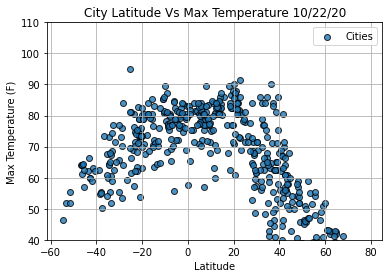

In [114]:
import time
plt.scatter(lats, max_temps, alpha=0.8, edgecolor="Black", linewidths=1, marker="o", label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(40,110)
plt.title(f"City Latitude Vs Max Temperature " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()


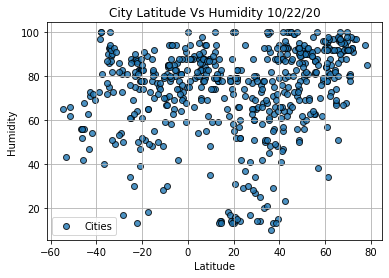

In [115]:
# Scatter plot for latitide vs humidity
plt.scatter(lats, humidity, marker="o", alpha=0.8, edgecolor="black", linewidths=1, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude Vs Humidity " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


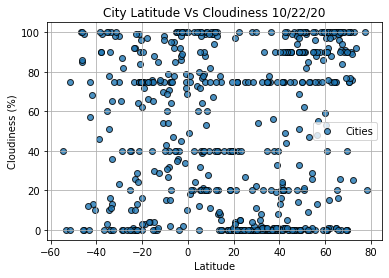

In [118]:
# Plot Latitude vs Cloudiness
plt.scatter(lats, cloudiness, marker="o", alpha=0.8, edgecolor="black", linewidths=1, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude Vs Cloudiness " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

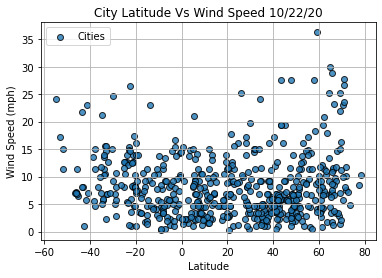

In [119]:
# Plot Latitude vs Cloudiness
plt.scatter(lats, wind_speed, marker="o", alpha=0.8, edgecolor="black", linewidths=1, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude Vs Wind Speed " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()